<a href="https://colab.research.google.com/github/boopathi09876/project23/blob/main/boopathi_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset (Assume CSV file downloaded from Kaggle)
df = pd.read_csv('AMZN.csv')  # Replace with actual path
print(df.head())


         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [10]:
# Convert 'Date' to datetime and set as index
# Check the column names before proceeding
print(df.columns)

# The following lines are redundant as the 'Date' column has already been
# converted to datetime and set as the index in a previous cell.
# Uncommenting or removing these lines will resolve the KeyError.
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Remove duplicates - This operation is still valid on the index
df = df[~df.index.duplicated()]

# Handle missing values
df.fillna(method='ffill', inplace=True)

print(df.info())

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6257 entries, 1997-05-15 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6257 non-null   float64
 1   High       6257 non-null   float64
 2   Low        6257 non-null   float64
 3   Close      6257 non-null   float64
 4   Adj Close  6257 non-null   float64
 5   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 471.2 KB
None


<ipython-input-10-c79c9de7ae61>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


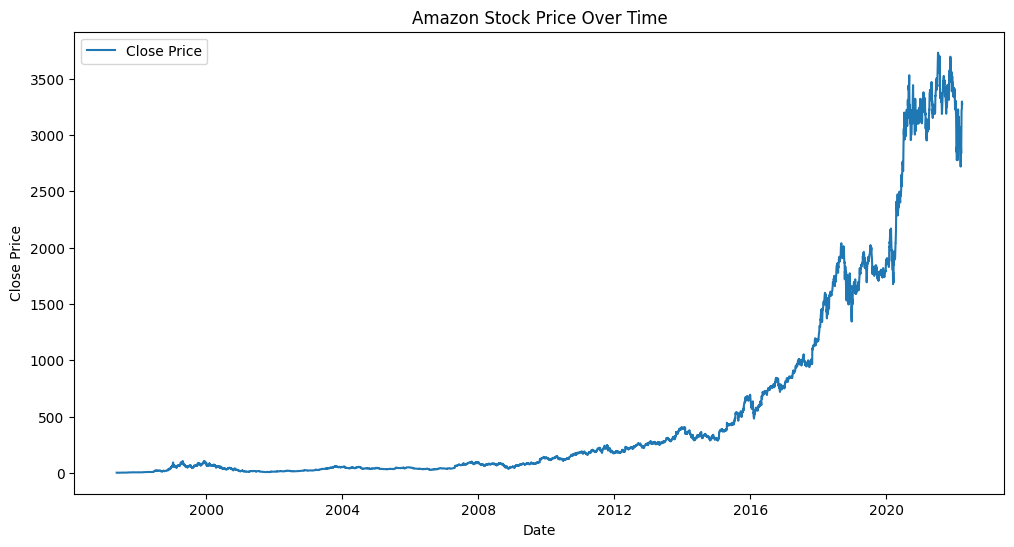

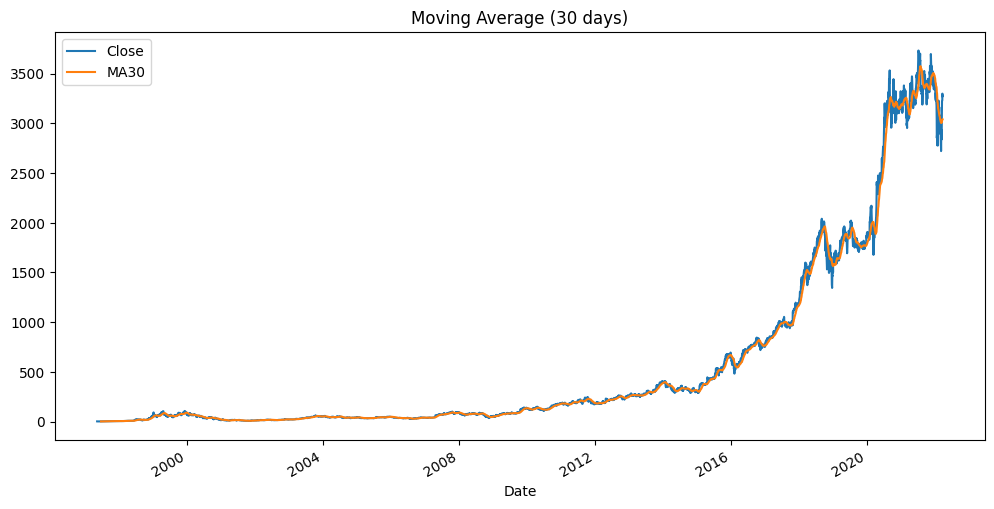

In [11]:
import matplotlib.pyplot as plt

# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Moving average
df['MA30'] = df['Close'].rolling(window=30).mean()
df[['Close', 'MA30']].plot(figsize=(12, 6))
plt.title('Moving Average (30 days)')
plt.show()


In [12]:
# Lag features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

# Rolling statistics
df['Rolling_Mean'] = df['Close'].rolling(window=5).mean()
df['Rolling_Std'] = df['Close'].rolling(window=5).std()

df.dropna(inplace=True)
print(df[['Close', 'Lag_1', 'Lag_2', 'Rolling_Mean', 'Rolling_Std']].head())

               Close     Lag_1     Lag_2  Rolling_Mean  Rolling_Std
Date                                                               
1997-06-26  1.510417  1.510417  1.510417      1.511459     0.009317
1997-06-27  1.489583  1.510417  1.510417      1.504167     0.009317
1997-06-30  1.541667  1.489583  1.510417      1.512500     0.018634
1997-07-01  1.515625  1.541667  1.489583      1.513542     0.018634
1997-07-02  1.588542  1.515625  1.541667      1.529167     0.038025


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

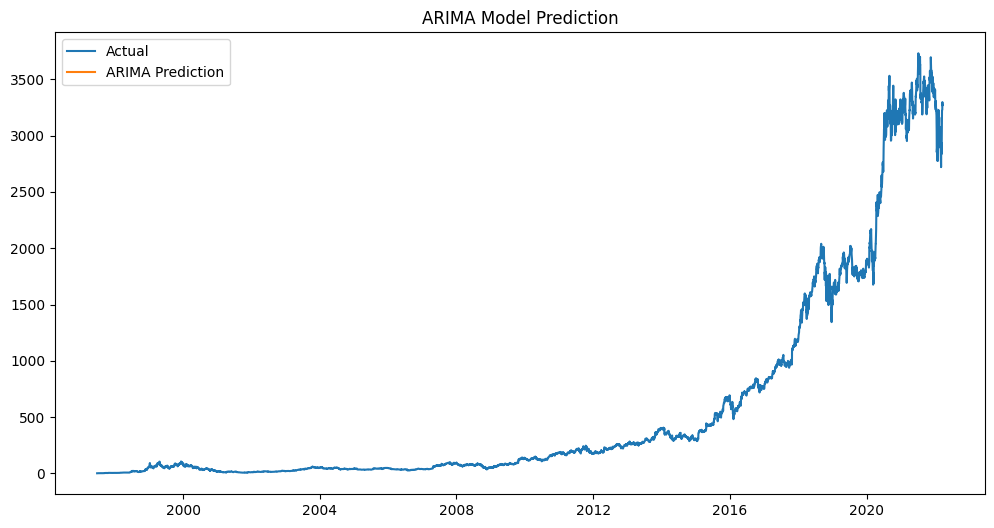

In [13]:

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_arima = ARIMA(df['Close'], order=(5, 1, 0))
arima_result = model_arima.fit()
df['ARIMA_Pred'] = arima_result.predict(start=1, end=len(df), typ='levels')

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(df['ARIMA_Pred'], label='ARIMA Prediction')
plt.legend()
plt.title('ARIMA Model Prediction')
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


193/193 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - loss: 0.0086
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.8404e-04
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 2.0724e-04
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 2.0074e-04
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 1.6005e-04
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - loss: 1.4216e-04
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 1.3989e-04
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.1832e-04
Epoch 9/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 1.2964e-04
Epoch 10/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 1.0636e-04
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step


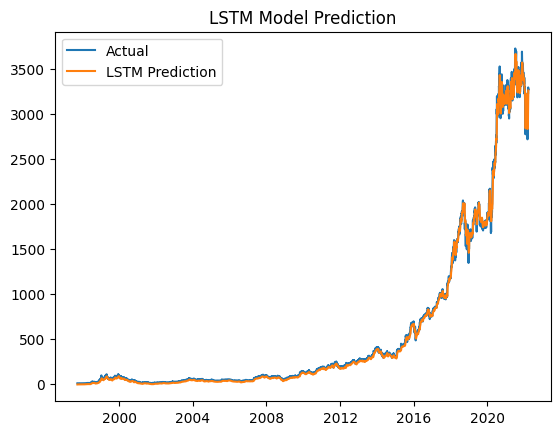

In [14]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Scale the data
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Prepare sequences
def create_sequences(data, seq_length=60):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

x, y = create_sequences(scaled_close)
x = x.reshape((x.shape[0], x.shape[1], 1))

# Build model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(x, y, epochs=10, batch_size=32)

# Predict
predicted = model_lstm.predict(x)
predicted = scaler.inverse_transform(predicted)

plt.plot(df.index[60:], df['Close'].values[60:], label='Actual')
plt.plot(df.index[60:], predicted, label='LSTM Prediction')
plt.legend()
plt.title('LSTM Model Prediction')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np # Ensure numpy is imported if not already

rmse_lstm = np.sqrt(mean_squared_error(df['Close'].values[60:], predicted))
mae_lstm = mean_absolute_error(df['Close'].values[60:], predicted)

print(f'LSTM RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}')

LSTM RMSE: 33.25, MAE: 20.91


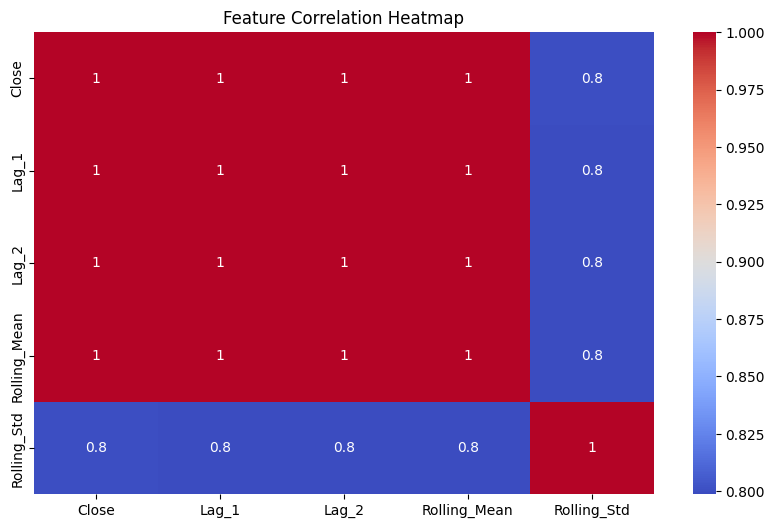

In [18]:

import seaborn as sns

# Correlation heatmap for engineered features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Close', 'Lag_1', 'Lag_2', 'Rolling_Mean', 'Rolling_Std']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



In [19]:
# Save predictions
df.to_csv('AMZN_predictions.csv')

# For Google Colab - Share notebook directly or upload to GitHub

